In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import pandas as pd

/Users/anahithakobyan/opt/anaconda3/lib/python3.8/site-packages/pandas/core/computation/expressions.py:20: UserWarning: Pandas requires version '2.7.3' or newer of 'numexpr' (version '2.7.1' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


In [2]:
processed_data = pd.read_csv('cleaned_data.csv')

In [3]:
X = processed_data.drop('overall', axis=1)  # Features
y = processed_data['overall']  # Target

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [5]:
predictions = model.predict(X_test)

In [6]:
mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

In [7]:
print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

# Interpreting the coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
print(coefficients)

Mean Squared Error: 4.614815044364448
R-squared: 0.9013888957338276
                              Coefficient
value_eur                    5.931073e-01
wage_eur                     4.300343e-01
age                          4.023097e-01
height_cm                   -2.113758e-01
weight_kg                    9.619330e-02
nationality_id              -1.844252e-01
skill_moves                  5.063049e-01
international_reputation     3.584792e-02
pace                         8.274393e-01
shooting                    -3.467486e+00
passing                      3.795389e-01
dribbling                    1.493902e+00
defending                   -1.074407e-01
physic                       3.050331e-01
attacking_crossing           4.651375e-01
attacking_finishing          2.612508e+00
attacking_heading_accuracy   1.317394e+00
attacking_short_passing      1.240490e+00
attacking_volleys            6.457825e-02
skill_dribbling             -9.165410e-01
skill_curve                 -1.660273e-01
skill_fk

In [8]:
import statsmodels.api as sm
# Adding a constant to the model (statsmodels doesn't add it by default)
X_train_sm = sm.add_constant(X_train)

# Creating the model
model = sm.OLS(y_train, X_train_sm)

# Fitting the model
results = model.fit()

# Printing the summary of the model
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                overall   R-squared:                       0.906
Model:                            OLS   Adj. R-squared:                  0.906
Method:                 Least Squares   F-statistic:                     2544.
Date:                Wed, 06 Dec 2023   Prob (F-statistic):               0.00
Time:                        12:21:57   Log-Likelihood:                -33359.
No. Observations:               15391   AIC:                         6.684e+04
Df Residuals:                   15332   BIC:                         6.729e+04
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                                  coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------------
const             

In [12]:
X_sm = sm.add_constant(X)
predictions = results.predict(X_sm)

In [13]:
predictions

0        95.571493
1        96.879246
2        93.759414
3        97.572818
4        99.063138
           ...    
19234    54.882145
19235    53.193524
19236    52.357814
19237    51.592526
19238    53.145401
Length: 19239, dtype: float64

In [14]:
preds = predictions.values.tolist()
actuals = y.values.tolist()

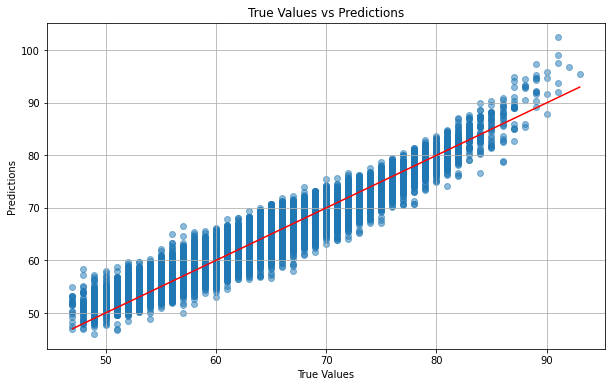

In [15]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
plt.scatter(actuals, preds, alpha=0.5)
plt.title('True Values vs Predictions')
plt.xlabel('True Values')
plt.ylabel('Predictions')
plt.plot([min(actuals), max(actuals)], [min(actuals), max(actuals)], color='red') # Ideal 1:1 line
plt.grid(True)
plt.show()

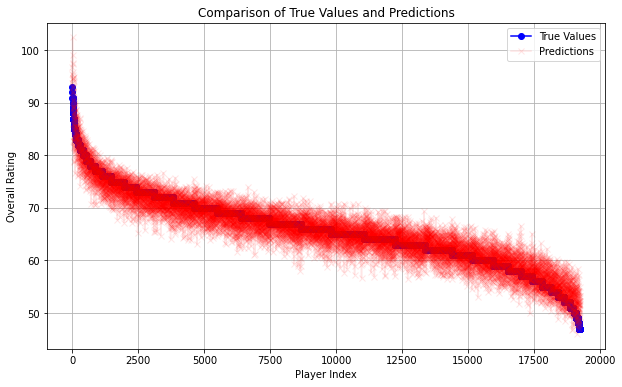

In [16]:
plt.figure(figsize=(10, 6))
plt.plot(actuals, label='True Values', color='blue', marker='o')
plt.plot(preds, label='Predictions', color='red', marker='x',  alpha=0.1)
plt.title('Comparison of True Values and Predictions')
plt.xlabel('Player Index')
plt.ylabel('Overall Rating')
plt.legend()
plt.grid(True)
plt.show()

In [17]:
import scipy.stats
correlation, p_value = scipy.stats.pearsonr(actuals, preds)
print("Pearson Correlation Coefficient:", correlation)
print("P-value:", p_value)

Pearson Correlation Coefficient: 0.9513121416109822
P-value: 0.0


In [18]:
new_data = pd.DataFrame()
new_data['actual'] = actuals
new_data['pred'] = preds
new_data
new_data.to_csv('ratings.csv')

### Random Forest